#**Importing packages**#

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from sklearn.model_selection import train_test_split

#**Dataset Preparation**#


In [38]:
# create data frame to read data set
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip /content/bank.zip

--2025-07-07 15:11:08--  http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank.zip.1’

bank.zip.1              [    <=>             ] 565.47K   598KB/s    in 0.9s    

2025-07-07 15:11:10 (598 KB/s) - ‘bank.zip.1’ saved [579043]

Archive:  /content/bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: bank.csv                


In [39]:
# create data frame to read data set
df = pd.read_csv('bank-full.csv', sep=';')
df_test = pd.read_csv('bank.csv', sep=';') # 10 percent of full data

#**Dataset Outline**#

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#**Non-numerical Feature Analysis**#


*   bar plot for each feature(also sorted for yes result in target column)

In [42]:
categorical_features = [feature for feature in df.select_dtypes(include='object').columns if feature not in ['y']]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [43]:
for feature in categorical_features:
    print(feature, f"{len(df[feature].unique())} categories", ':\n', df[feature].unique())

job 12 categories :
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital 3 categories :
 ['married' 'single' 'divorced']
education 4 categories :
 ['tertiary' 'secondary' 'unknown' 'primary']
default 2 categories :
 ['no' 'yes']
housing 2 categories :
 ['yes' 'no']
loan 2 categories :
 ['no' 'yes']
contact 3 categories :
 ['unknown' 'cellular' 'telephone']
month 12 categories :
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 4 categories :
 ['unknown' 'failure' 'other' 'success']


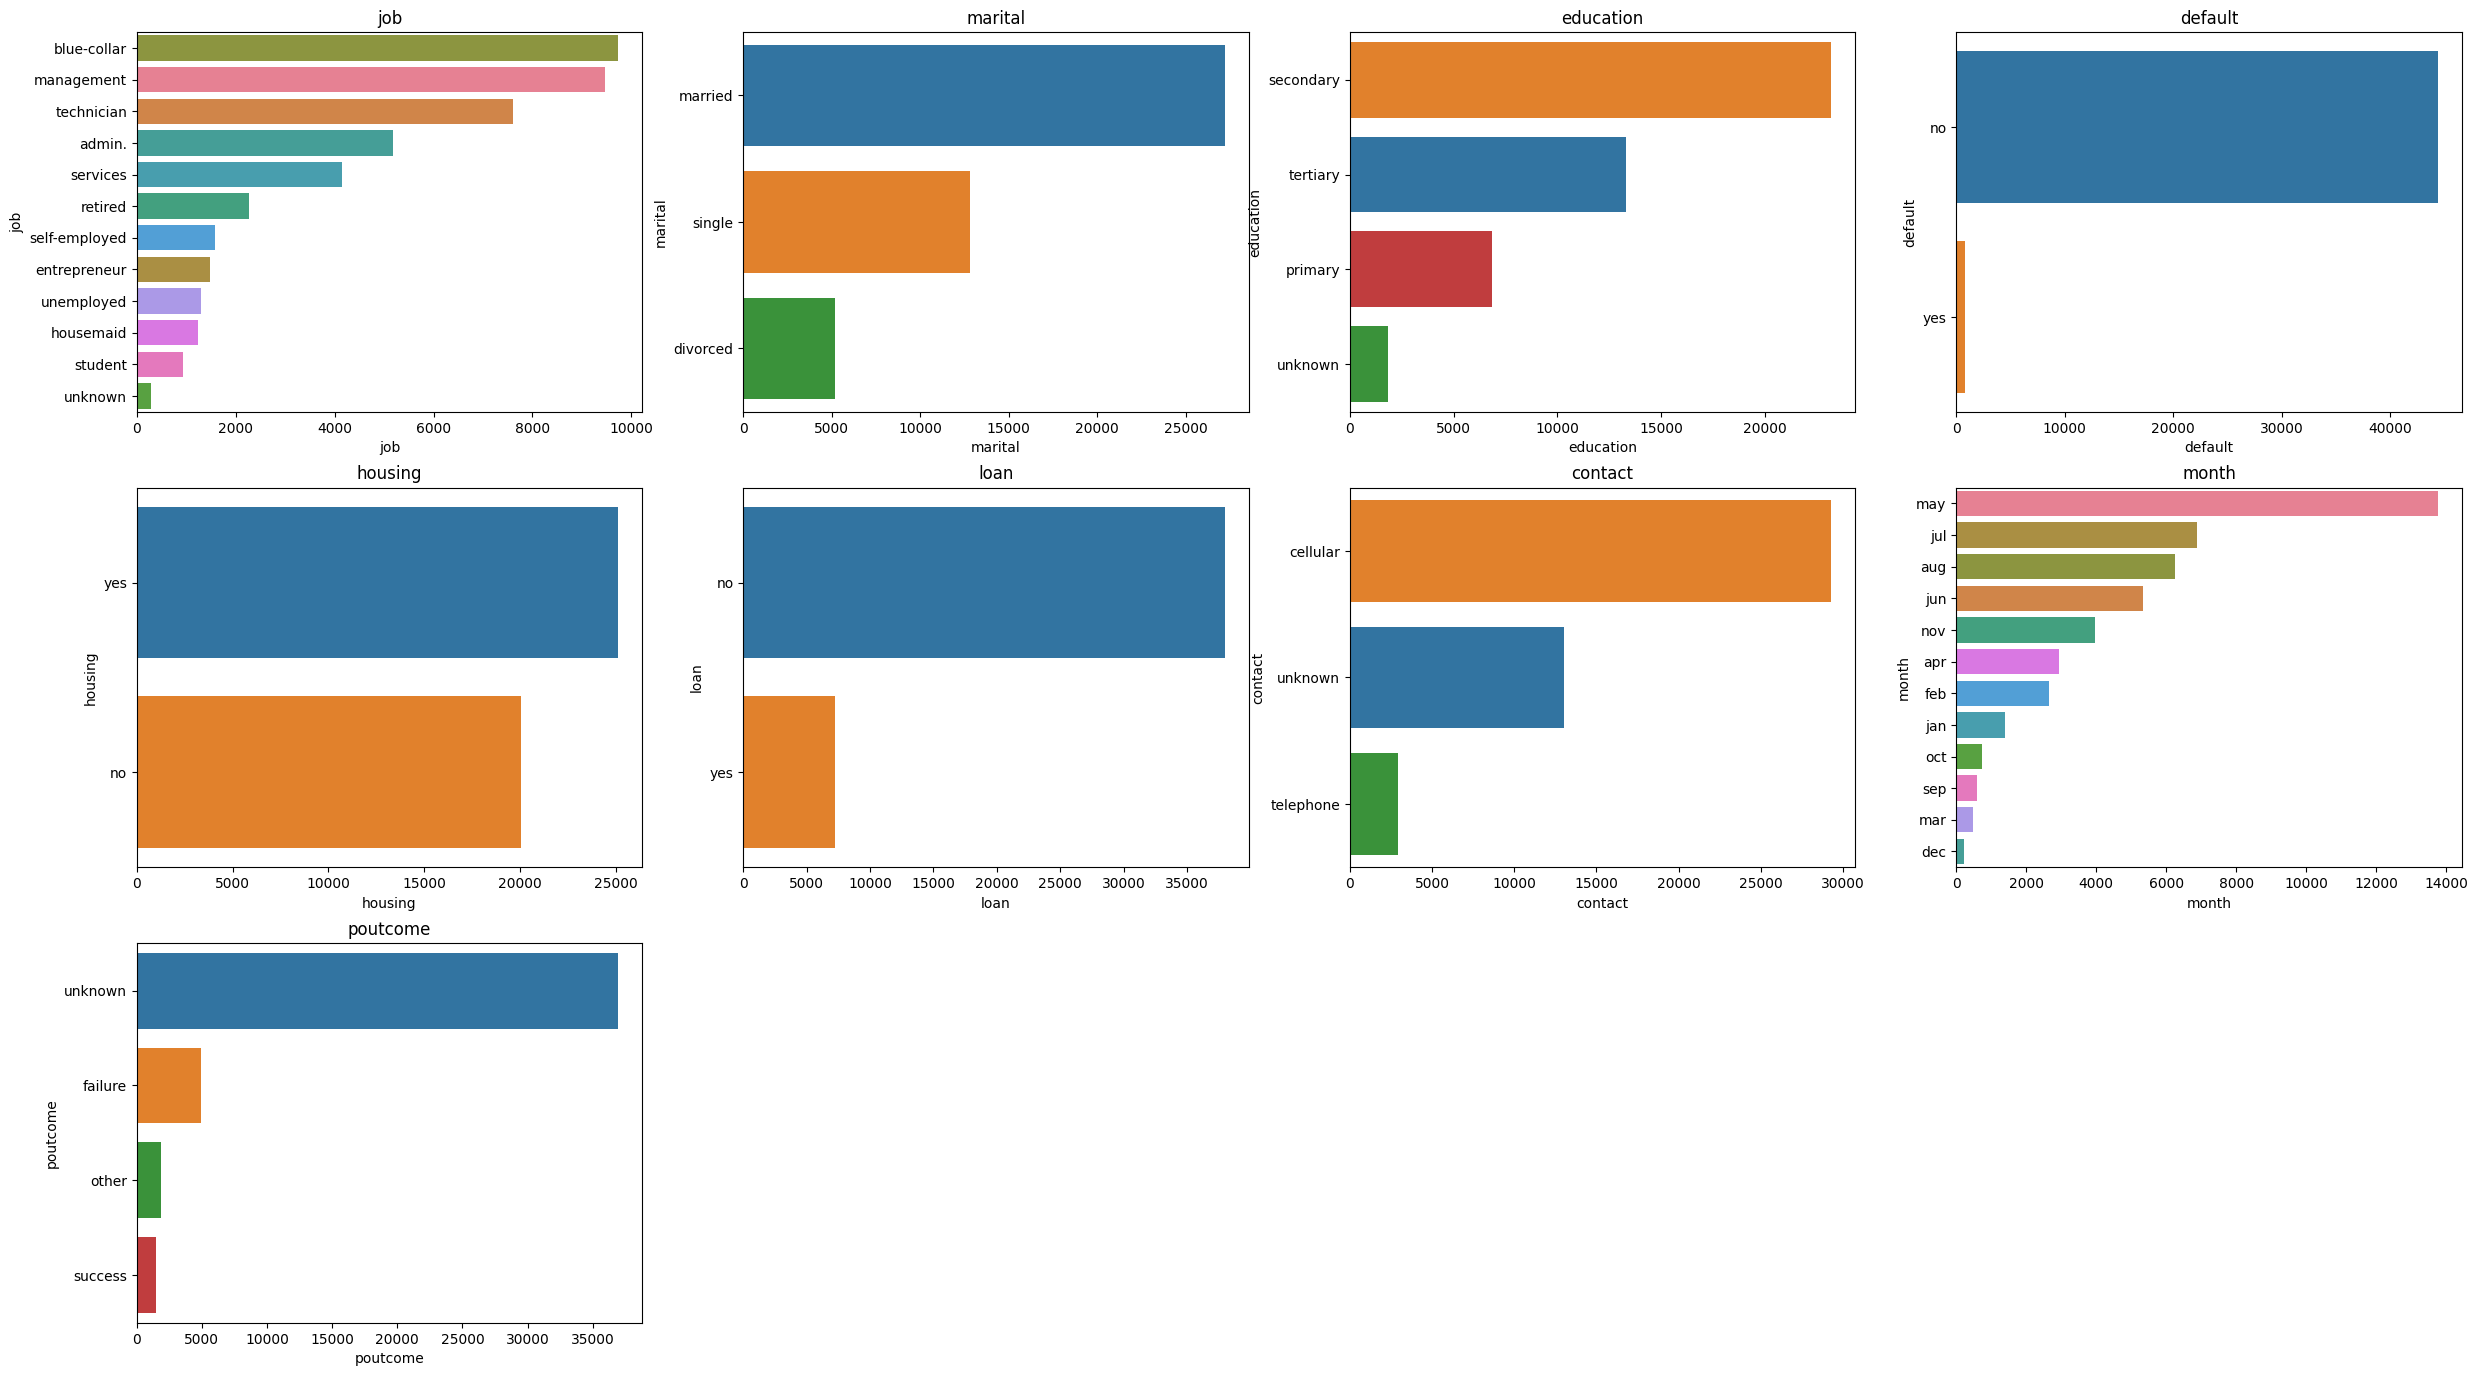

In [44]:
plt.figure(figsize=(30, 70), facecolor='white')

for i, feature in enumerate(categorical_features):
    plt.subplot(12,4,i+1)
    sns.countplot(y=feature, data=df, order= df[feature].value_counts().index, hue=feature)
    plt.xlabel(feature)
    plt.title(feature)
plt.show()

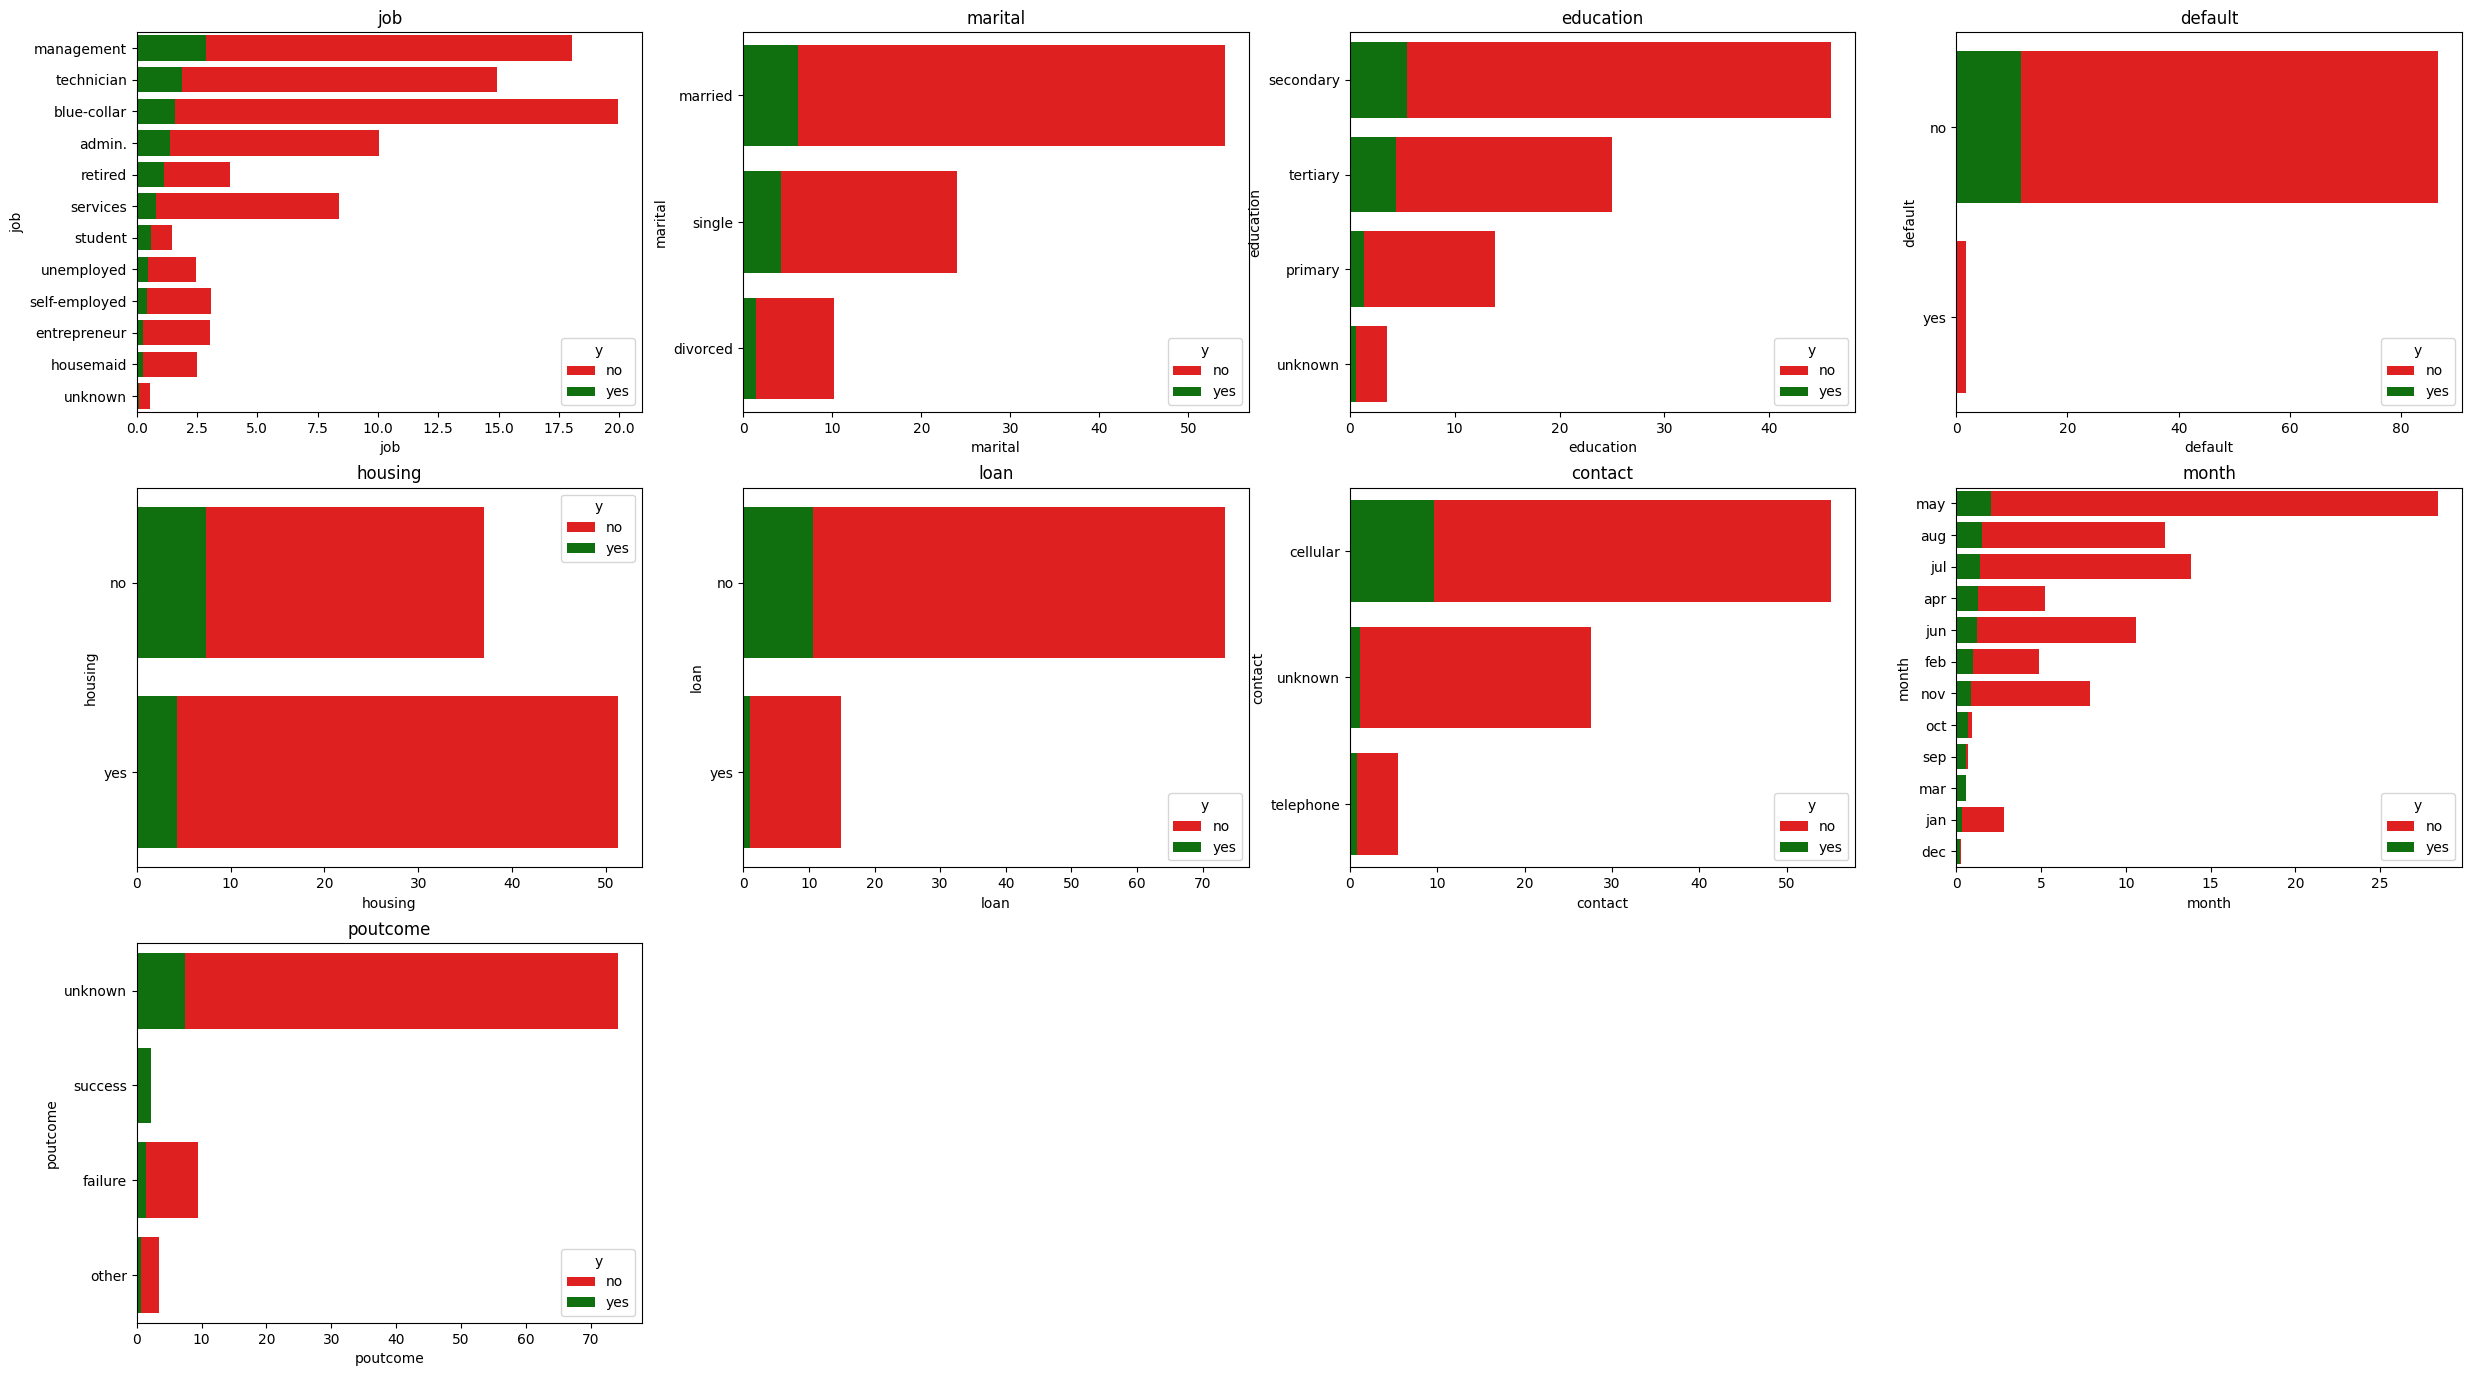

In [45]:
plt.figure(figsize=(30,70))

for i, feature in enumerate(categorical_features):
    plt.subplot(12,4,i+1)
    sns.countplot(y=feature, data=df, hue='y', stat='percent', dodge=False,
                  palette={'yes':'green', 'no':'red'},
                  order= df.groupby([feature, 'y']).size().unstack().sort_values('yes', ascending=False).index)
    plt.xlabel(feature)
    plt.title(feature)
plt.show()

#**Numerical Features Analysis**#


*   some statistical data of each feature
*   correlation matrix for getting relations

In [46]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'object' and feature not in ['y']]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [47]:
df.loc[:,numerical_features].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


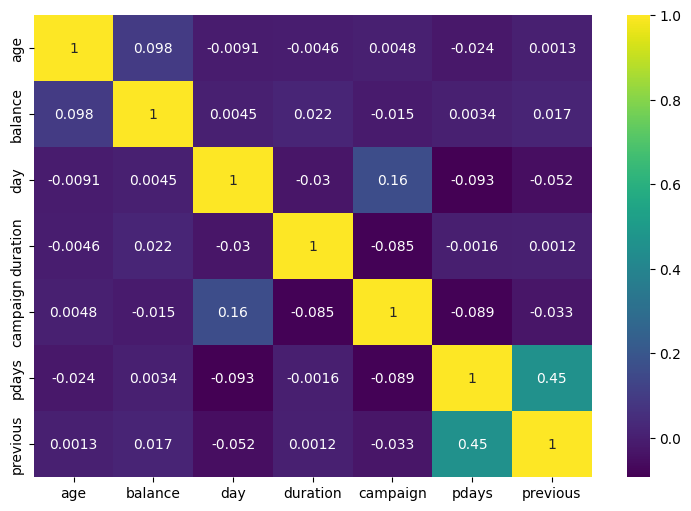

In [48]:
corr_mat = df.loc[:,numerical_features].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_mat, cmap='viridis', annot=True);

#**Feature Engineering**#


*   convert non-numeric columns to numeric ones

Note: we could use **one-hot endcoding(OHE)** or **deleting some features approach**!

In [49]:
df_copy = df.copy()

In [50]:
df.replace({'no':0, 'yes':1},inplace=True);
df.head()

/tmp/ipython-input-50-2714993716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'no':0, 'yes':1},inplace=True);


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [51]:
df['education'] = df['education'].replace({'unknown':0, 'primary':1,'secondary':2, 'tertiary':3});
df['poutcome'] = df['poutcome'].replace({'unknown':0, 'failure':1, 'other':2, 'success':3});
df['marital'] = df['marital'].replace({'divorced':0, 'single':1, 'married':2});
df['contact'] = df['contact'].replace({'unknown':0, 'telephone':1, 'cellular':2});
df['month'] = df['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                                   'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12});
df.head(10)

/tmp/ipython-input-51-3007549123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({'unknown':0, 'primary':1,'secondary':2, 'tertiary':3});
/tmp/ipython-input-51-3007549123.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['poutcome'] = df['poutcome'].replace({'unknown':0, 'failure':1, 'other':2, 'success':3});
/tmp/ipython-input-51-3007549123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,technician,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,entrepreneur,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,blue-collar,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,unknown,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
5,35,management,2,3,0,231,1,0,0,5,5,139,1,-1,0,0,0
6,28,management,1,3,0,447,1,1,0,5,5,217,1,-1,0,0,0
7,42,entrepreneur,0,3,1,2,1,0,0,5,5,380,1,-1,0,0,0
8,58,retired,2,1,0,121,1,0,0,5,5,50,1,-1,0,0,0
9,43,technician,1,2,0,593,1,0,0,5,5,55,1,-1,0,0,0


In [52]:
from sklearn.preprocessing import LabelEncoder

job_encoder = LabelEncoder()
job_encoder.fit(df['job'])
df['job'] = job_encoder.fit_transform(df['job'])

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,9,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,2,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,1,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,11,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
5,35,4,2,3,0,231,1,0,0,5,5,139,1,-1,0,0,0
6,28,4,1,3,0,447,1,1,0,5,5,217,1,-1,0,0,0
7,42,2,0,3,1,2,1,0,0,5,5,380,1,-1,0,0,0
8,58,5,2,1,0,121,1,0,0,5,5,50,1,-1,0,0,0
9,43,9,1,2,0,593,1,0,0,5,5,55,1,-1,0,0,0


#**Training Models**#

*   split dataset to train and test parts
*   scale the dataframe usign **StandardScaler**
*   train all models with their accuracy giving

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.2, random_state=42)

print(f"train data count: {len(X_train)}")
print(f"test data count: {len(X_test)}")

train data count: 36168
test data count: 9043


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=df.columns[:-1]).head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.006515,-1.020575,0.739370,-1.361941,-0.138113,-0.169381,0.892343,-0.438594,-1.517492,-0.098218,-0.475910,-0.719756,-0.565886,-0.411364,-0.244772,-0.415791
1,0.759937,1.423250,0.739370,-1.361941,-0.138113,0.017848,0.892343,-0.438594,0.711462,1.703422,0.353778,0.047138,-0.245389,-0.411364,-0.244772,-0.415791
2,0.100693,-1.326053,0.739370,-0.074637,-0.138113,0.820681,-1.120646,-0.438594,0.711462,1.823532,0.353778,-0.493970,0.395606,-0.411364,-0.244772,-0.415791
3,-0.370196,-0.104140,-0.705571,1.212666,-0.138113,-0.489588,0.892343,-0.438594,-1.517492,-0.578656,-0.061066,0.459781,2.639088,-0.411364,-0.244772,-0.415791
4,1.419181,-1.020575,0.739370,-1.361941,-0.138113,0.706889,-1.120646,-0.438594,0.711462,-0.098218,-0.890754,0.027674,-0.245389,-0.411364,-0.244772,-0.415791
5,-0.181840,1.423250,-0.705571,-0.074637,-0.138113,0.828951,-1.120646,-0.438594,0.711462,1.222985,0.768622,0.000424,2.959585,-0.411364,-0.244772,-0.415791
6,-1.029440,-0.104140,-0.705571,1.212666,-0.138113,-0.169381,0.892343,-0.438594,-1.517492,1.463204,-0.475910,0.015995,1.036601,-0.411364,-0.244772,-0.415791
7,-0.370196,0.812294,-2.150512,-0.074637,-0.138113,-0.318569,0.892343,2.280013,-1.517492,-1.299312,-0.475910,-0.166969,-0.245389,-0.411364,-0.244772,-0.415791
8,-1.406151,0.812294,0.739370,-0.074637,-0.138113,-0.268619,-1.120646,-0.438594,-1.517492,-1.539531,0.353778,-0.420005,-0.565886,-0.411364,-0.244772,-0.415791
9,1.325003,1.423250,0.739370,1.212666,-0.138113,-0.013578,-1.120646,-0.438594,0.711462,1.463204,0.353778,0.323531,-0.565886,0.507660,0.598884,3.870665


In [55]:
result = pd.DataFrame({},columns=['model', 'accuracy'])
result

,model,accuracy


In [56]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train_scaled, y_train)

score = f"{dtree.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'decision tree','accuracy': score }).to_frame().T], axis=0)

print(f'The decision tree accuracy is {score} %')

The decision tree accuracy is 87.28 %


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=7, random_state=42)

rf.fit(X_train_scaled, y_train)

score = f"{rf.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'random forest','accuracy': score }).to_frame().T], axis=0)

print(f'The random forest accuracy is {score} %')

The random forest accuracy is 89.56 %


In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled, y_train)

score = f"{knn.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'k nearest neighbors','accuracy': score }).to_frame().T], axis=0)

print(f'The k nearest neighbors accuracy is {score} %')

The k nearest neighbors accuracy is 89.65 %


In [59]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

svm.fit(X_train_scaled, y_train)

score = f"{svm.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'svm','accuracy': score }).to_frame().T], axis=0)

print(f'The svm accuracy is {score} %')

The svm accuracy is 89.52 %


In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)

lr.fit(X_train_scaled, y_train)

score = f"{lr.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'logistic regression','accuracy': score }).to_frame().T], axis=0)

print(f'The logistic regression accuracy is {score} %')

The logistic regression accuracy is 89.47 %


In [61]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,50,20), max_iter=500)

mlp.fit(X_train_scaled, y_train)

score = f"{mlp.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'multi-layer perceptron','accuracy': score }).to_frame().T], axis=0)

print(f'The multi-layer perceptron accuracy is {score} %')

The multi-layer perceptron accuracy is 88.76 %


In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

score = f"{gnb.score(X_test_scaled, y_test) * 100:.2f}"
result = pd.concat([result, pd.Series({'model': 'Gaussian naive bayes','accuracy': score }).to_frame().T], axis=0)

print(f'The Gaussian naive bayes accuracy is {score} %')

The Gaussian naive bayes accuracy is 83.89 %


#**Result Comparision**#


*   compare besed on accuracy
*   confusion matrix of models
*   classification report of models



In [63]:
result.sort_values('accuracy', ascending=False).reset_index(drop=True)

,model,accuracy
0,k nearest neighbors,89.65
1,random forest,89.56
2,svm,89.52
3,logistic regression,89.47
4,multi-layer perceptron,88.76
5,decision tree,87.28
6,Gaussian naive bayes,83.89


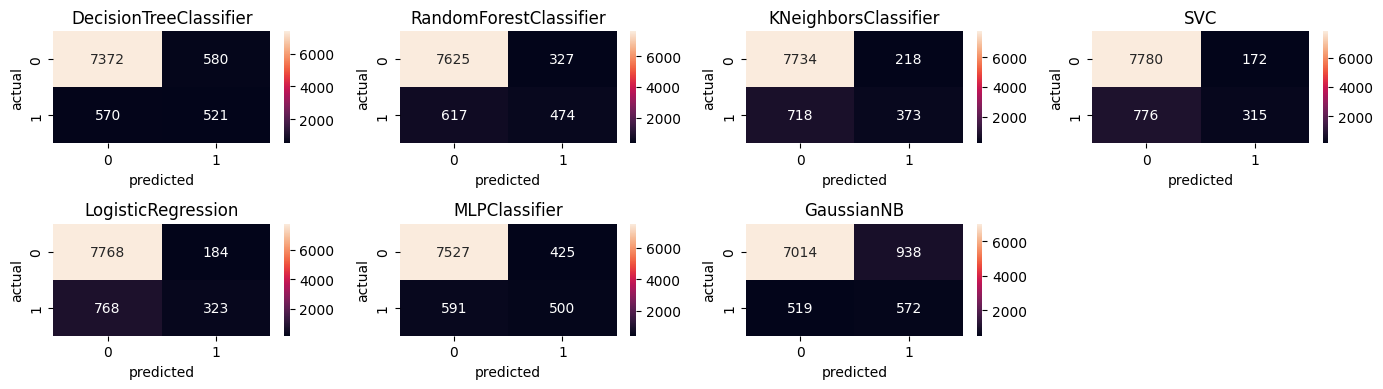

In [64]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,4))

for i, model in enumerate([dtree, rf, knn, svm, lr, mlp, gnb]):
    plt.subplot(2,4, i+1)
    plt.title(f'{model.__class__.__name__}')
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test_scaled)), annot=True, fmt='d')
    plt.xlabel("predicted")
    plt.ylabel("actual")

plt.tight_layout()

In [65]:
from sklearn.metrics import classification_report

for i, model in enumerate([dtree, rf, knn, svm, lr, mlp, gnb]):
    print(f"\n\n{model.__class__.__name__} \n")
    print(classification_report(y_test, model.predict(X_test_scaled)))



DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



RandomForestClassifier 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7952
           1       0.59      0.43      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.70      0.72      9043
weighted avg       0.88      0.90      0.89      9043



KNeighborsClassifier 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      

#**Saving Models**#


*   saving models with pickle for further using
*   saving encoder and scaler
*   saving dataframe

In [67]:
import pickle

try:
    for i, model in enumerate([dtree, rf, knn, svm, lr, mlp, gnb]):
        with open(f'{model.__class__.__name__}.pickle', 'wb') as file:
            pickle.dump(model, file)
        print(f"\n{model.__class__.__name__}")
        print("file is created successfully!")

except e:
    print(e)


DecisionTreeClassifier
file is created successfully!

RandomForestClassifier
file is created successfully!

KNeighborsClassifier
file is created successfully!

SVC
file is created successfully!

LogisticRegression
file is created successfully!

MLPClassifier
file is created successfully!

GaussianNB
file is created successfully!


In [ ]:
try:
    with open(f'job_encoder.pickle', 'wb') as file:
            pickle.dump(job_encoder, file)

    print("\njob_encoder")
    print("file is created successfully!")
except e:
    print(e)


job_encoder
file is created successfully!


In [68]:
try:
    with open(f'scaler.pickle', 'wb') as file:
            pickle.dump(scaler, file)

    print("\nscaler")
    print("file is created successfully!")
except e:
    print(e)


scaler
file is created successfully!


In [ ]:
try:
    with open(f'df.pickle', 'wb') as file:
            pickle.dump(df, file)

    print("\ndataframe")
    print("file is created successfully!")
except e:
    print(e)


dataframe
file is created successfully!
